# Classification

Classification tasks predict the categories, classes, or bins that data fall into. Classification tasks can be binary (e.g. deciding whether a product review was written by an actual customer or is AI-generated/paid review, identifying bank transactaions as legitimate or fraud, predicting how a registered voter will vote...assuming two political parties, etc.) or multi-class (e.g. what bird is making that call, what varietal of wine goes best with this meal, what major should a student pursue, etc). 

We'll start by focusing on binary classification tasks, introducing some concepts that apply to all such tasks. We'll introduce some ways we assess classification models.

## Binary classification

Binary classification assigns each data point (feature vector) to one of two categories, often referred to as *Positive* and *Negative*. It is important to define which of the two categories corresponds to Positive and which to Negative.

 - Mushroom id: P = poisonous, N = edible
 - Cancer classification: P = malignant, N = benign
 - GenAI usage detector: P = AI generated, N = student written

Just as in regression, we'll train our models on a training set and evaluate our models on the training and testing set. But instead of residuals, we have correct and incorrect identifications. For binary classification, correct predictions and mistakes are described as one of four groups:

*Correct*
 - True Positive (TP) - a correct positive identification
 - True Negative (TN) - a correct negative identification

*Incorrect*
 - False Positive (FP) - a negative case that was mis-classified as positive
 - False Negative (FN) - a positive case that was mis-classified as negative

In hypothesis testing, False Positives and False Negatives are often referred to as Type I and Type II errors respectively. Which is worse, FP or FN? Or is a mistake just a mistake?

It depends on the situation. 
 - Which is the more egregious errors for each of the examples above?
 - Come up with two novel examples, one in which FP is the worse error and another in which FN is the worse error? Can you think of a general rule for which kind of error should be avoided?

### An example

In the following example, we'll use Logistic Regression (we'll go into detail about this algorithm in the next lecture) to classify breast tumors as malignant or benign based on the physical properties of the tumor (e.g. size, shape, texture).


In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing  import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import ConfusionMatrixDisplay


In [2]:

# Load the breast cancer dataset
bc_df, y = load_breast_cancer(return_X_y=True, as_frame=True)

display(bc_df.describe())
display(y.describe())

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


count    569.000000
mean       0.627417
std        0.483918
min        0.000000
25%        0.000000
50%        1.000000
75%        1.000000
max        1.000000
Name: target, dtype: float64

In [3]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(bc_df, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train a logistic regression model
model = LogisticRegression()
model.fit(X_train_scaled, y_train)

# Make predictions
y_pred = model.predict(X_test_scaled)

### Confusion Matrix

The *Confusion Matrix* is a graphical representation of the predictions a classifier has made on the data set. The confusion matrix is an nxn grid where n is the number of categories; for binary classification, the confusion matrix is always 2x2.

Let's look at the confusion matrix for the breast tumor classification above.

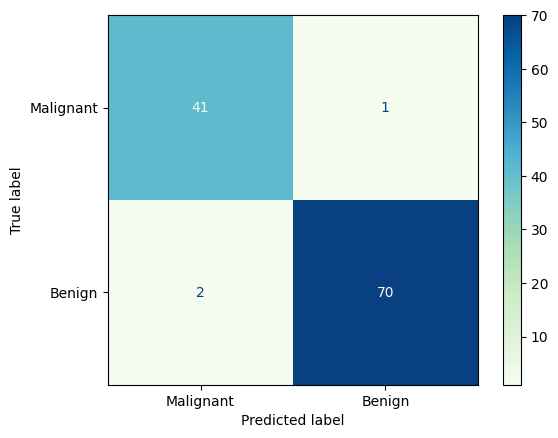

In [4]:
ConfusionMatrixDisplay.from_predictions(y_pred, y_test, 
                                        #normalize = 'true',
                                        display_labels = ['Malignant', 'Benign'],
                                        # display_labels = ['Neg', 'Pos'],
                                        cmap = 'GnBu'
                                        )
plt.show()

### Binary classification metrics

There are also several metrics commonly used in binary classification: Accuracy, Precision, Recall, F1 score

 - *Accuracy* - The percentage of correct predictions overall

    $$
    \text{Accuracy} = \frac{TP + TN}{TP+TN+FP+FN}
    $$

 - *Precision* - The percentage of positive predictions that were correct

    $$
    \text{Precision} = \frac{TP}{TP + FP}
    $$

 - *Recall* - The percentage of positive cases predicted correctly

    $$
    \text{Recall} = \frac{TP}{TP+FN}
    $$

 - *F1 score* - A hybrid metric comprising precision and recall

    $$ 
    \text{F1} = \frac{2 \cdot Precision \cdot Recall}{Precision + Recall} = \frac{2 \cdot TP}{2 \cdot TP + FP + FN}
    $$

**Now you try**

Calculate the accuracy, precision, recall, and F1 score (by hand) for the confusion matrix above. Which metric is most useful/appropriate for this classification problem.